In [1]:
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import datetime
import pandas as pd

from plotly.subplots import make_subplots
import plotly.graph_objects as go

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv('Energy_consumption_dataset.csv')

*Data Description*

Month : Represents the month of the year (1–12). Useful for categorizing month data into seasons.

Hour : Hourly readings of the day (0–23), useful for categorizing time data into morning, afternoon, evening, and night.

DayOfWeek : Categorical variable indicating the day of the week

Holiday : Boolean categorical variable indicating whether the day is a holiday.

Temperature : Numerical variable representing the temperature in degrees Celsius.

Humidity : Numerical variable showing the humidity level as a percentage.

SquareFootage : Numerical variable measuring the area of the building or space.

Occupancy : Numerical variable representing the number of people in the area.

HVACUsage : Categorical variable indicating the usage of Heating, Ventilation, and Air Conditioning systems.

LightingUsage : Categorical variable indicating the usage of lighting systems.

RenewableEnergy : Numerical variable representing the percentage contribution of renewable energy sources.

EnergyConsumption :Numerical target variable representing the total energy consumed.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Month              5000 non-null   int64  
 1   Hour               5000 non-null   int64  
 2   DayOfWeek          5000 non-null   object 
 3   Holiday            5000 non-null   object 
 4   Temperature        5000 non-null   float64
 5   Humidity           5000 non-null   float64
 6   SquareFootage      5000 non-null   float64
 7   Occupancy          5000 non-null   int64  
 8   HVACUsage          5000 non-null   object 
 9   LightingUsage      5000 non-null   object 
 10  RenewableEnergy    5000 non-null   float64
 11  EnergyConsumption  5000 non-null   float64
dtypes: float64(5), int64(3), object(4)
memory usage: 468.9+ KB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Month,5000.0,6.251200,3.588687,1.000000,3.000000,6.000000,9.000000,12.000000
Hour,5000.0,11.556000,6.888306,0.000000,6.000000,11.000000,18.000000,23.000000
Temperature,5000.0,24.946823,3.041678,20.007565,22.453790,24.831846,27.427281,29.998671
Humidity,5000.0,45.478146,8.972690,30.015975,38.111104,45.793124,52.696651,59.969085
SquareFootage,5000.0,1507.403201,293.147209,1000.512661,1253.906598,1513.581105,1754.846457,1999.982252
Occupancy,5000.0,4.576000,2.906185,0.000000,2.000000,5.000000,7.000000,9.000000
RenewableEnergy,5000.0,15.201195,9.157038,0.006642,7.477928,15.343830,22.889997,29.965327
EnergyConsumption,5000.0,76.794919,9.231573,53.263278,70.419588,76.696267,83.246274,99.201120


In [5]:
#cek missing value
pd.DataFrame(df.isna().sum().reset_index(name='Na'))

,index,Na
0,Month,0
1,Hour,0
2,DayOfWeek,0
3,Holiday,0
4,Temperature,0
5,Humidity,0
6,SquareFootage,0
7,Occupancy,0
8,HVACUsage,0
9,LightingUsage,0


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.head()

,Month,Hour,DayOfWeek,Holiday,Temperature,Humidity,SquareFootage,Occupancy,HVACUsage,LightingUsage,RenewableEnergy,EnergyConsumption
0,1,0,Saturday,No,25.139433,43.431581,1565.693999,5,On,Off,2.774699,75.364373
1,1,1,Saturday,No,27.731651,54.225919,1411.064918,1,On,On,21.831384,83.401855
2,1,2,Saturday,No,28.704277,58.907658,1755.715009,2,Off,Off,6.764672,78.270888
3,1,3,Saturday,No,20.080469,50.371637,1452.316318,1,Off,On,8.623447,56.519850
4,1,4,Saturday,No,23.097359,51.401421,1094.130359,9,On,Off,3.071969,70.811732


2. Data Visualization

In [8]:
num_cols = df.select_dtypes(include = ['int64', 'float64']).columns
cat_cols = df.select_dtypes(exclude = ['int64', 'float64']).columns

In [9]:
num_cols

Index(['Month', 'Hour', 'Temperature', 'Humidity', 'SquareFootage',
       'Occupancy', 'RenewableEnergy', 'EnergyConsumption'],
      dtype='object')

In [10]:
cat_cols

Index(['DayOfWeek', 'Holiday', 'HVACUsage', 'LightingUsage'], dtype='object')

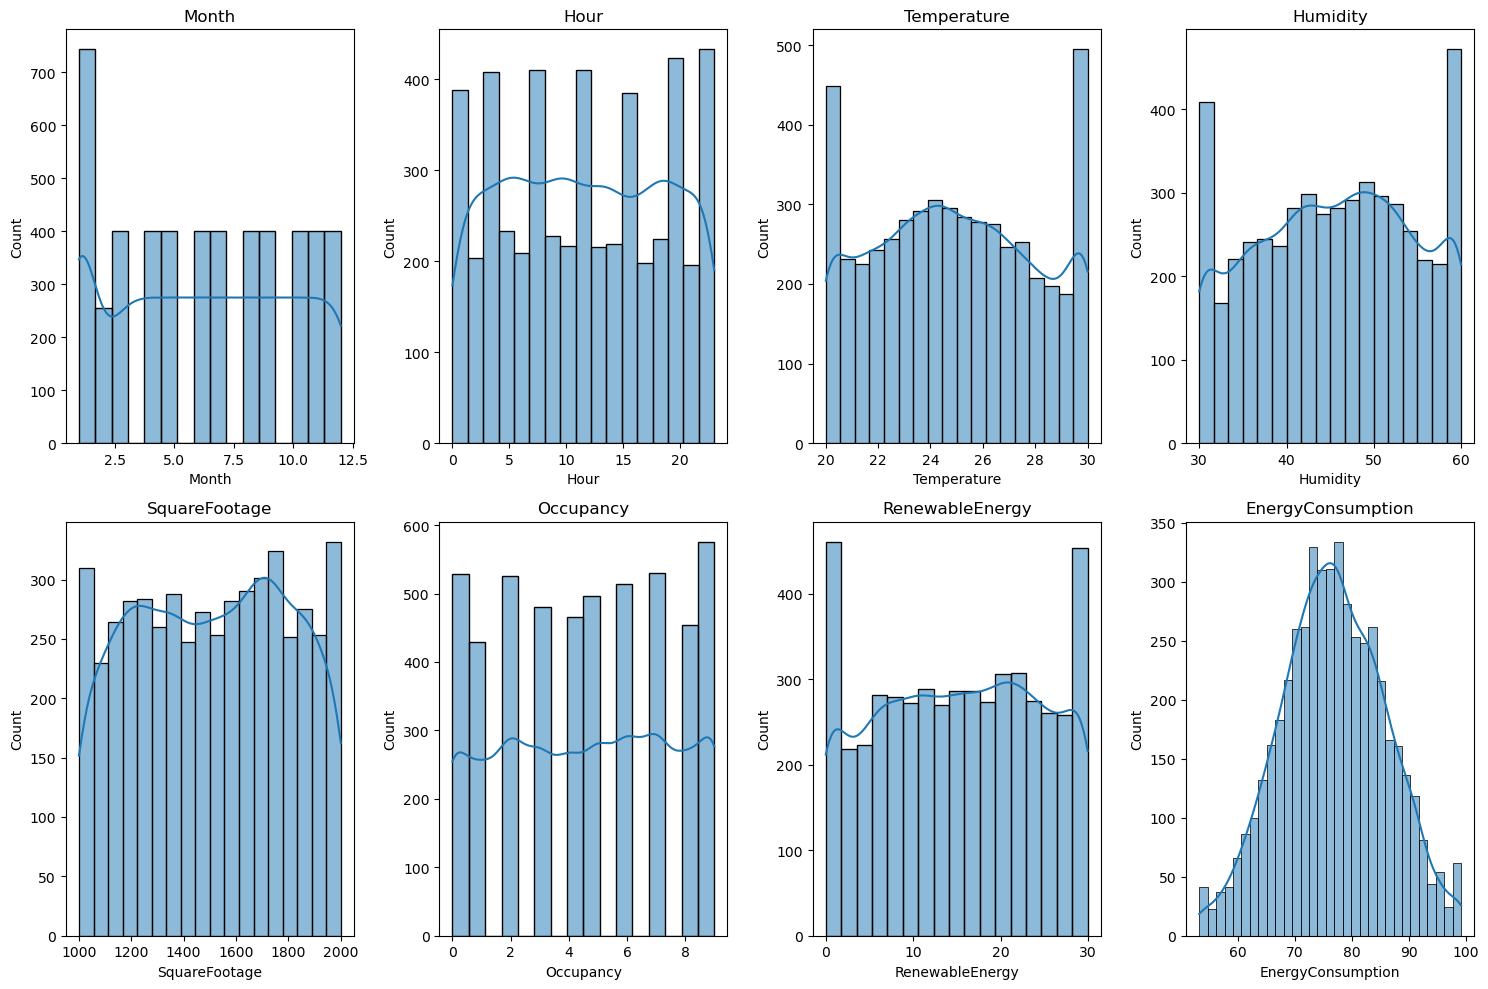

In [11]:
#histogram
f, ax = plt.subplots(2,4, figsize=(15,10))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.histplot(data = df, x= cols, ax = ax[index],kde=True)
    ax[index].set_title(cols)

plt.tight_layout()
plt.show() 

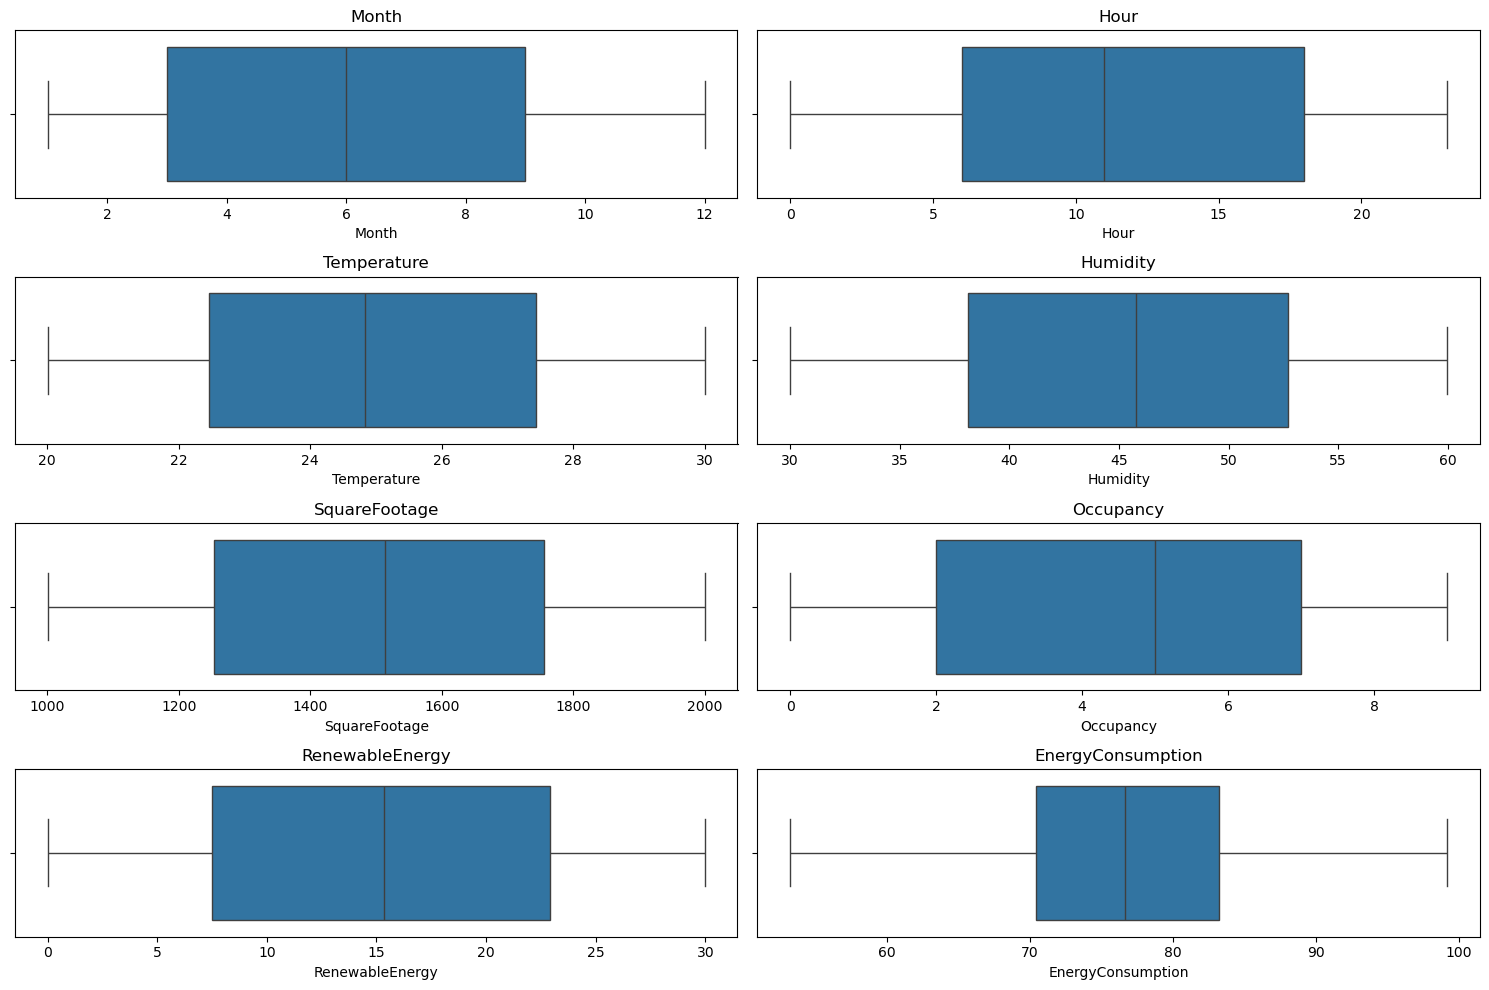

In [12]:
#boxplot
f, ax = plt.subplots(4,2 , figsize=(15,10))
ax = ax.flatten()

for index, cols in enumerate(num_cols):
    sns.boxplot(df, x= cols , ax= ax[index])
    ax[index].set_title(cols)

plt.tight_layout()
plt.show()

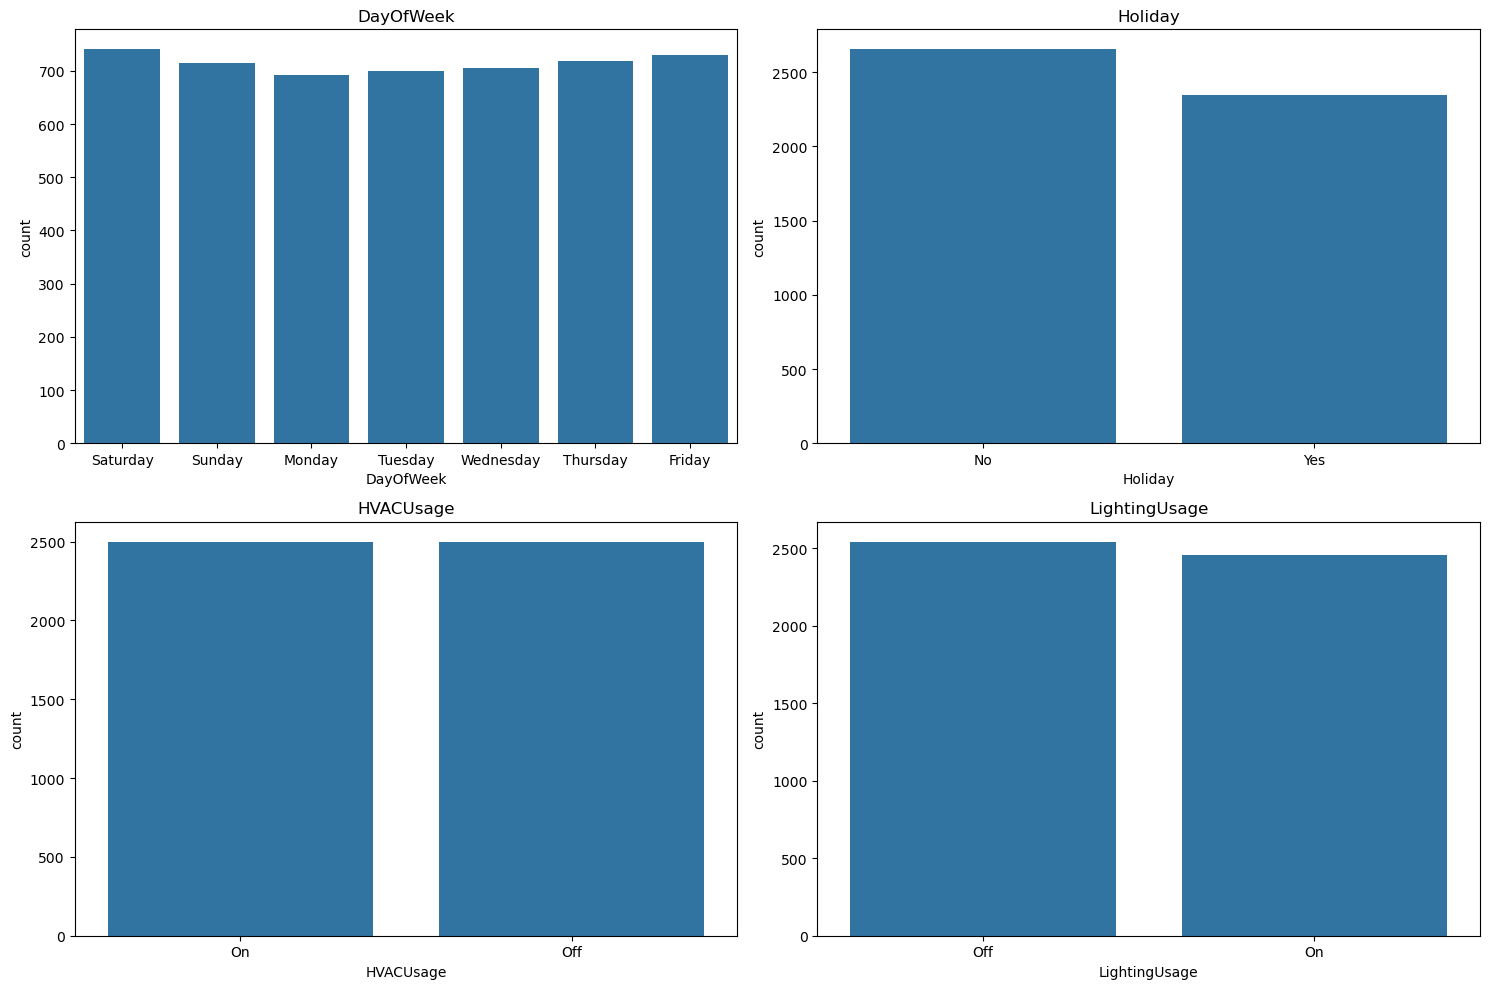

In [13]:
#countplot
f, ax = plt.subplots(2,2 , figsize=(15,10))
ax = ax.flatten()

for index, cols in enumerate(cat_cols):
    sns.countplot(df, x= cols , ax= ax[index])
    ax[index].set_title(cols)

plt.tight_layout()
plt.show()

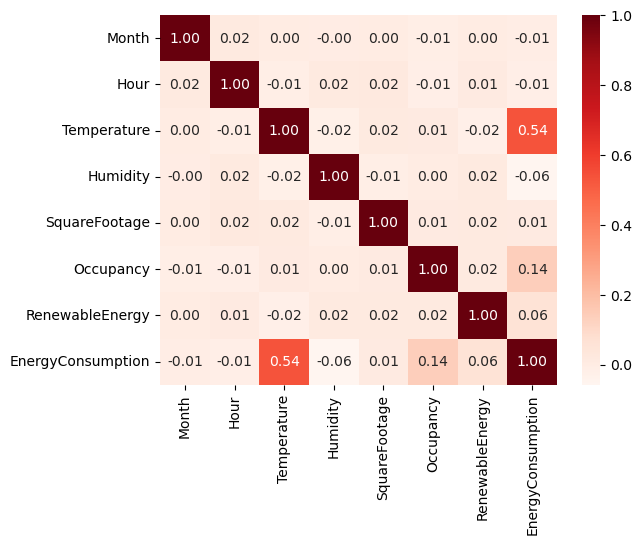

In [14]:
#heaatmap
sns.heatmap(df[num_cols].corr(),annot=True, cmap='Reds',fmt= '.2f')
plt.show()

Changes in average energy consumption by Month

In [15]:
mas = df.groupby(['Month'])['EnergyConsumption'].mean().reset_index(name = 'Average EC')

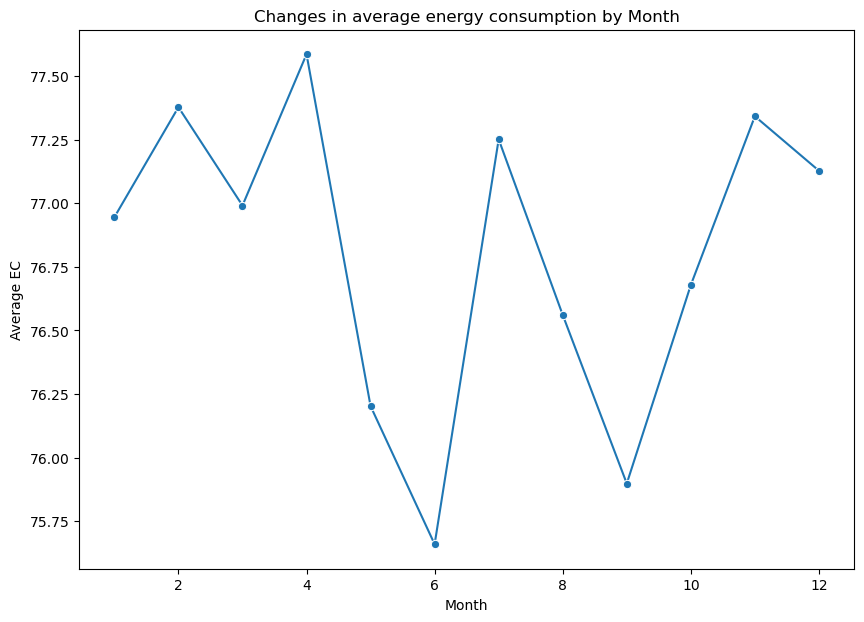

In [16]:
plt.figure(figsize=(10,7))
sns.lineplot(mas, x = 'Month', y= 'Average EC', marker = 'o')
plt.title('Changes in average energy consumption by Month')
plt.show()

Changes in average energy consumption by Hour

In [17]:
mhs = df.groupby(['Hour'])['EnergyConsumption'].mean().reset_index(name = 'Average EC')

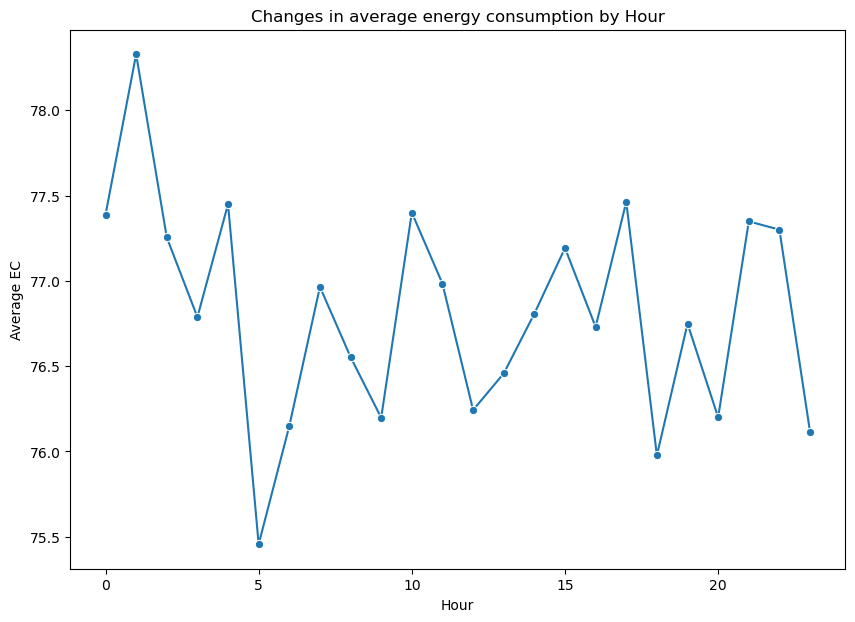

In [18]:
plt.figure(figsize=(10,7))
sns.lineplot(mhs, x = 'Hour', y= 'Average EC', marker = 'o')

plt.title('Changes in average energy consumption by Hour')
plt.show()

Average energy consumption by day of the week

In [19]:
dowec = df.groupby(['DayOfWeek'])['EnergyConsumption'].mean().reset_index(name = 'Average EC')

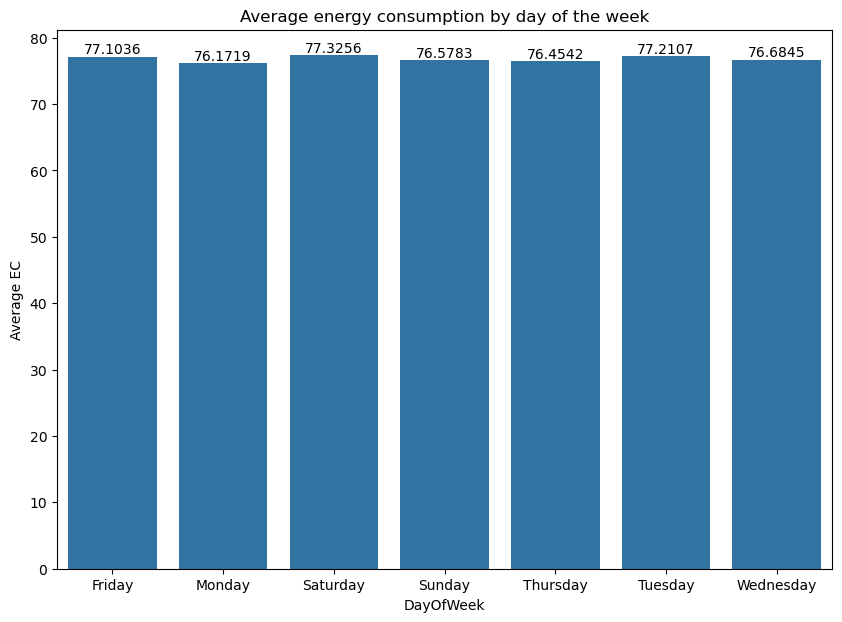

In [20]:
plt.figure(figsize=(10,7))

ax = sns.barplot(data = dowec, x = 'DayOfWeek', y = 'Average EC')
ax.bar_label(ax.containers[0], fontsize=10)

plt.title('Average energy consumption by day of the week')
plt.show()

1. Energy consumption does not differ significantly by time zone, month, or day of the week.
2. Energy consumption tends to increase when it is hot and cold.